<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/Session_06_Unsupervised_Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import matplotlib.image as mpimg
from skimage import data, color, io, filters, morphology,transform, exposure, feature
from scipy import ndimage
from skimage.io import imread, imshow
from sklearn import linear_model, datasets
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##  Clustering

A supermarket collected some data from its customers. The supermarket wants to use this data to better understand its customers. To do this, it wants to apply clustering. This way, customers with a similar profile are grouped together. This allows the supermarket to offer more targeted promotions to each cluster of customers.

You can find the data in the file 'customer.csv'.

In [3]:
dataset = pd.read_csv('./Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data analysis

In [ ]:
# Remove CustomerID
dataset = dataset.drop('CustomerID',axis=1)
dataset.head()



,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Examine the distribution by gender. What is the ratio of male customers to female customers? Use the seaborn countplot for this.

Male : Female ratio = 88 : 112 (0.79 : 1)


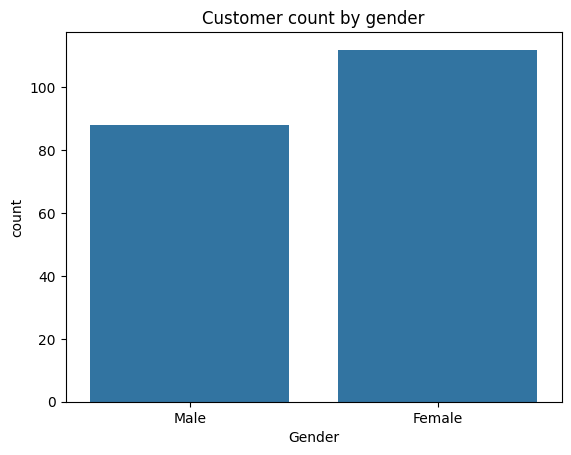

In [4]:
# Distribution by gender
sns.countplot(x='Gender', data=dataset)
counts = dataset['Gender'].value_counts()   # e.g. Male 112, Female 88
ratio  = counts['Male'] / counts['Female']  # or vice-versa
print(f"Male : Female ratio = {counts['Male']} : {counts['Female']} "
      f"({ratio:.2f} : 1)")
plt.title("Customer count by gender")
plt.show()



*Determine* if women appear to spend more money than men. Visualize this with a boxplot.

⚠️ What’s still needed to answer the “ratio” part
The question also asks: “What is the ratio of male customers to female customers?”
The plot alone doesn’t print that number, so add one line to compute it:

Average spending score:
Gender
Female    51.526786
Male      48.511364
Name: Spending_Score, dtype: float64


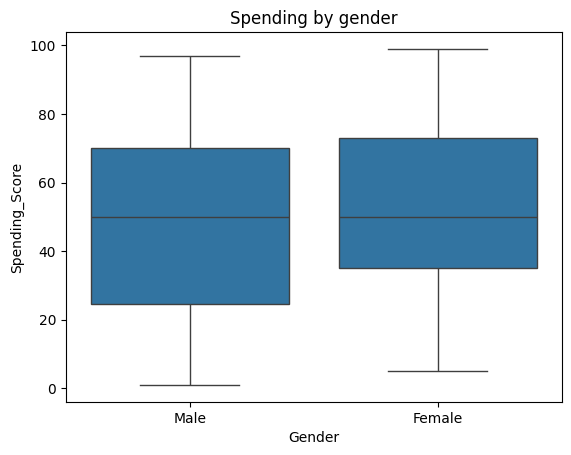

In [5]:
# Boxplot of spending by gender
sns.boxplot(x='Gender', y='Spending_Score', data=dataset)
plt.title("Spending by gender")
means = dataset.groupby('Gender')['Spending_Score'].mean()
print("Average spending score:")
print(means)
plt.show()


Draw the histograms of Age, Income, and Spending score. You can use the seaborn distplot for this. Are they normally distributed?

age and annualincome are not normally distrubuted spending score is .

sns.distplot is deprecated (removed in seaborn 0.12).
Use sns.histplot (with kde=True if you want the smooth curve) or sns.kdeplot.

All three calls are drawn on the same axis, so the plots will sit on top of each other.
Put each distribution in its own figure or subplot.

You didn’t actually inspect whether they look normal. Add titles or print skew statistics.

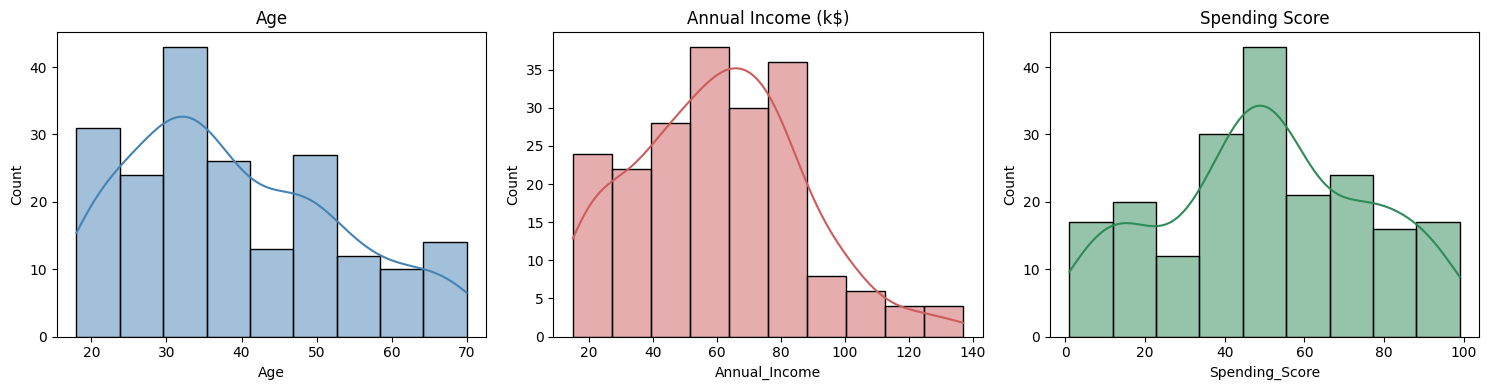

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))

sns.histplot(dataset['Age'], kde=True, ax=ax[0], color='steelblue')
ax[0].set_title("Age")

sns.histplot(dataset['Annual_Income'], kde=True, ax=ax[1], color='indianred')
ax[1].set_title("Annual Income (k$)")

sns.histplot(dataset['Spending_Score'], kde=True, ax=ax[2], color='seagreen')
ax[2].set_title("Spending Score")

plt.tight_layout()
plt.show()


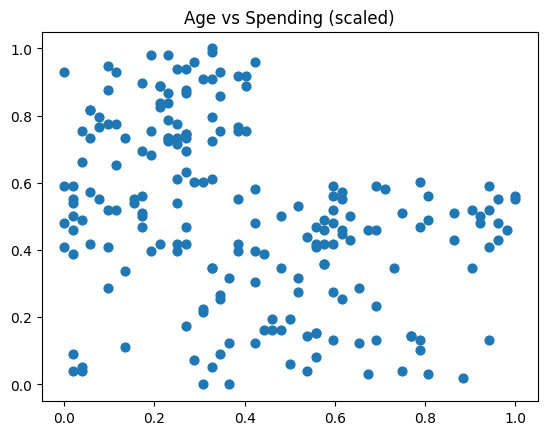

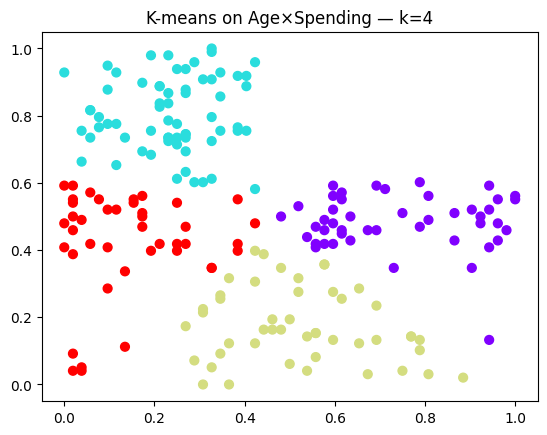

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# 1️⃣ select real columns
XZ = dataset[['Age', 'Spending_Score']].values

# 2️⃣ scale
XZ_scaled = MinMaxScaler().fit_transform(XZ)

# 3️⃣ visual inspection
plt.scatter(*XZ_scaled.T, s=40)
plt.title("Age vs Spending (scaled)"); plt.show()

# 4️⃣ K-means, pick k=4 after eyeballing
k = 4
labels = KMeans(n_clusters=k, random_state=0).fit_predict(XZ_scaled)

plt.scatter(*XZ_scaled.T, c=labels, cmap='rainbow', s=40)
plt.title(f"K-means on Age×Spending — k={k}"); plt.show()


### **🟢 Simple Explanation - K-Means Clustering on Age and Spending**

---

1. **Select Data:** Pick **Age** and **Spending Score** as the features.

```python
XZ = dataset[['Age', 'Spending_Score']].values
```

---

2. **Scale the Data:** Normalize the data so it ranges from **0** to **1** (important for fair clustering).

```python
XZ_scaled = MinMaxScaler().fit_transform(XZ)
```

---

3. **Visualize the Data:** Plot the scaled data to **see** the distribution.

```python
plt.scatter(*XZ_scaled.T, s=40)
plt.title("Age vs Spending (scaled)"); plt.show()
```

---

4. **Run K-Means:** Group the data into **4** clusters.

```python
k = 4
labels = KMeans(n_clusters=k, random_state=0).fit_predict(XZ_scaled)

plt.scatter(*XZ_scaled.T, c=labels, cmap='rainbow', s=40)
plt.title(f"K-means on Age×Spending — k={k}"); plt.show()
```

---

* **Clusters** are formed based on **similarities**.
* **Different colors** represent **different clusters**.


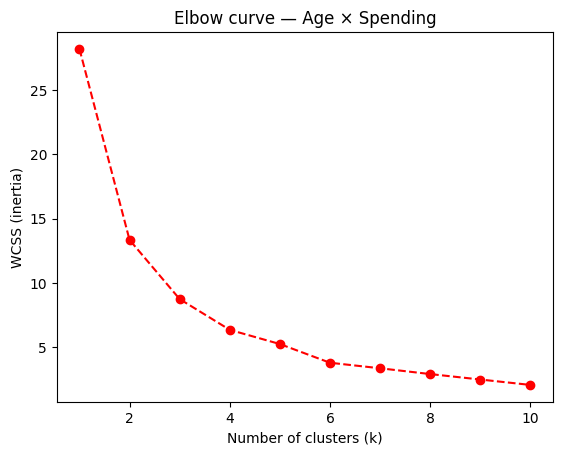

In [8]:
inertias = []
for k in range(1, 11):
    inertias.append(
        KMeans(k, random_state=0).fit(XZ_scaled).inertia_
    )

plt.plot(range(1,11), inertias, 'o--', color='red')
plt.xlabel('Number of clusters (k)'); plt.ylabel('WCSS (inertia)')
plt.title('Elbow curve — Age × Spending'); plt.show()


### **🟢 Simple Explanation - Elbow Method for Finding Optimal Clusters**

The **Elbow Method** helps you **find** the **optimal number of clusters** for **K-Means**. It works by **measuring** the **total distance** (called **inertia** or **WCSS**) between each data point and its **closest cluster center**.

---

**Steps:**

1. **Test Different K Values:** Run **K-Means** for a **range** of **cluster numbers** (e.g., 1 to 10).

2. **Calculate Inertia:** Measure the **inertia** for each **K** value. Inertia **drops** as you **add** more clusters, but the **improvement** gets **smaller** at some point.

3. **Find the Elbow:** Look for the **"elbow"** in the **plot**, where the **inertia** starts to **flatten**. This point **balances** having **enough** clusters to **capture** structure **without** adding **too many**.

---

The **elbow** is usually the **optimal number of clusters** because it **captures** the **main structure** in the data without **overfitting**.


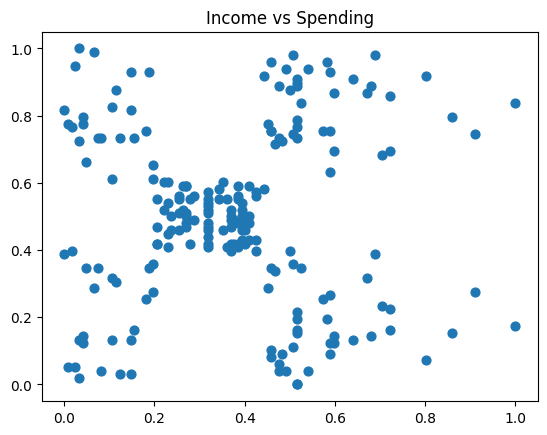

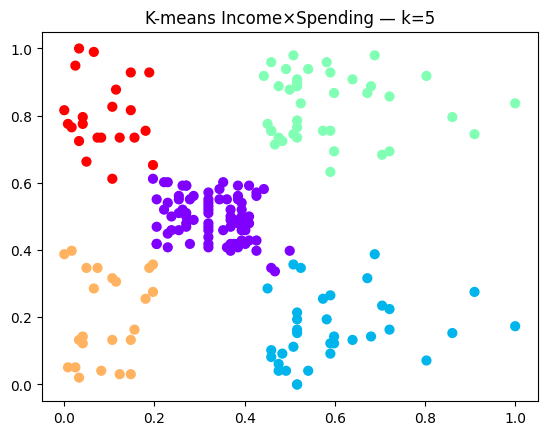

In [9]:
XZ = dataset[['Annual_Income', 'Spending_Score']].values
XZ_scaled = MinMaxScaler().fit_transform(XZ)

plt.scatter(*XZ_scaled.T, s=40); plt.title("Income vs Spending"); plt.show()

k = 5     # pick after elbow
labels = KMeans(k, random_state=0).fit_predict(XZ_scaled)

plt.scatter(*XZ_scaled.T, c=labels, cmap='rainbow', s=40)
plt.title(f"K-means Income×Spending — k={k}"); plt.show()


### **🟢 Simple Explanation - K-Means Clustering on Income and Spending**

This code is **grouping** customers based on their **Annual Income** and **Spending Score** into **5 clusters** using the **K-Means** algorithm.

---

**Steps:**

1. **Data Preparation:** The data is first **normalized** (scaled) so that **Annual Income** and **Spending Score** are on a **similar scale**. This **prevents** the algorithm from being **biased** towards one feature.

2. **Cluster Creation:** The algorithm then **divides** the customers into **5 groups** (clusters) based on their **spending** and **income** patterns.

3. **Visualization:** The final step **plots** these clusters in **different colors**, helping you **see** the **natural** groups in the data.

---

This approach helps businesses **identify** different **customer types**, like **"high spenders"** or **"budget shoppers"**, for **better** **marketing** and **customer** **segmentation**.


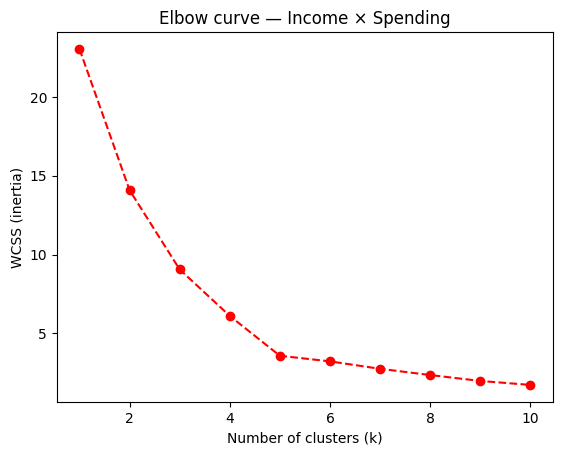

In [10]:
inertias = []
for k in range(1, 11):
    inertias.append(
        KMeans(k, random_state=0).fit(XZ_scaled).inertia_
    )

plt.plot(range(1,11), inertias, 'o--', color='red')
plt.xlabel('Number of clusters (k)'); plt.ylabel('WCSS (inertia)')
plt.title('Elbow curve — Income × Spending'); plt.show()


### **🟢 Simple Explanation - Elbow Method for Finding the Optimal Number of Clusters**

This code is using the **Elbow Method** to **find** the **best** number of **clusters** for the **K-Means** algorithm.

---

**Steps:**

1. **Test Different Cluster Numbers:** It tries different **values** for **k** (number of clusters), from **1** to **10**, and **calculates** how well the data **fits** in each case.

2. **Calculate Inertia (WCSS):** It measures the **inertia** (also called **WCSS** - **Within-Cluster Sum of Squares**), which shows **how tightly** the points in each cluster are grouped.

3. **Find the Elbow Point:** It **plots** these **inertia values** on a graph. The **"elbow"** (where the curve **bends** sharply) is the **best** number of clusters, as adding more clusters **beyond** this point doesn't **significantly** improve the grouping.

---

**Why Use It?**

This method helps you **avoid** **overfitting** (too many clusters) and **underfitting** (too few clusters), making your **clustering** more **meaningful**.


Now try to cluster the scatterplot between Gender and Spending Score. You will notice that there is affinity between the data points. A method suitable for clustering this connected data is spectral clustering. Apply this to Annual Income and Spending Score.
More information about SpectralClustering can be found at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

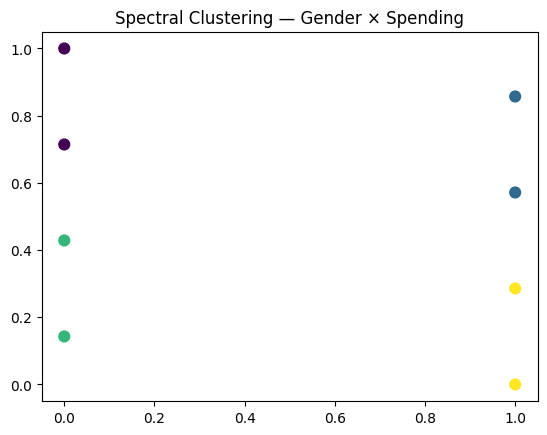

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import SpectralClustering

# Create a sample dataset (if you haven't loaded one)
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Spending_Score': [10, 20, 30, 40, 50, 60, 70, 80]
}
dataset = pd.DataFrame(data)

# Prepare the data
XZ = dataset[['Gender', 'Spending_Score']].copy()
XZ['Gender'] = LabelEncoder().fit_transform(XZ['Gender'])  # Encode Gender to 0 and 1
XZ_scaled = MinMaxScaler().fit_transform(XZ)  # Scale the features

# Spectral Clustering
spec = SpectralClustering(n_clusters=4, affinity='rbf', gamma=1.0,
                          n_init=10, random_state=0)
labels = spec.fit_predict(XZ_scaled)

# Plot the clusters
plt.scatter(*XZ_scaled.T, c=labels, s=60, cmap='viridis')
plt.title("Spectral Clustering — Gender × Spending")
plt.show()


### **🟢 Simple Explanation - Spectral Clustering for Beginners (No Code)**

---

**Spectral Clustering** is a more **advanced** way of **grouping** data points that focuses on their **relationships** rather than just **distance**. It is especially useful when your data has **complex shapes** or is not **linearly separable**, meaning it cannot be separated with a straight line.

---

#### **🔷 Key Steps:**

1. **Prepare the Data:**

   * First, the data is **encoded** into **numbers** if it contains **categories** like **Male** and **Female**.
   * Then, the data is **scaled** to a common range, typically **0-1**, to make the clustering more **accurate**.

---

2. **Build the Affinity Matrix:**

   * Spectral Clustering **measures** the **similarity** between each data point.
   * This is done using an **affinity matrix**, which captures the **relationship** between data points, not just their **distance**.

---

3. **Cluster the Data:**

   * The algorithm **groups** the data into a **fixed** number of **clusters**.
   * It uses a **mathematical trick** to **map** the data into a higher-dimensional space where the clusters are easier to **separate**.

---

4. **Visualize the Clusters:**

   * The final step is to **plot** the clusters to **see** how the data has been **grouped**.
   * The **colors** represent the different **clusters**.

---

#### **🔷 Why Use Spectral Clustering?**

* **Better** for **complex** and **non-linear** shapes.
* **Captures** the **relationships** between data points **better** than methods like **K-Means**.
* **Flexible** with different types of **similarity** measures, like the **RBF** kernel.

---

Would you like me to explain how this is **different** from **K-Means** and when to **choose** one over the other? 😊


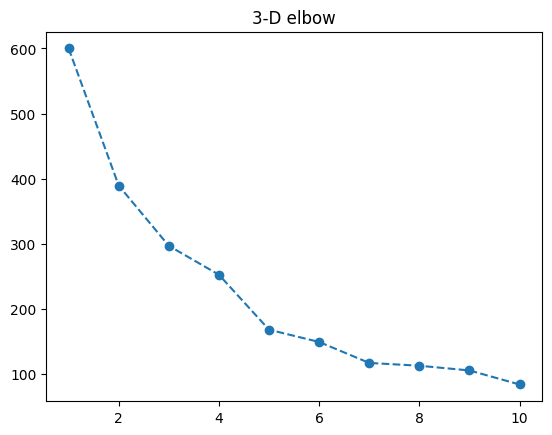

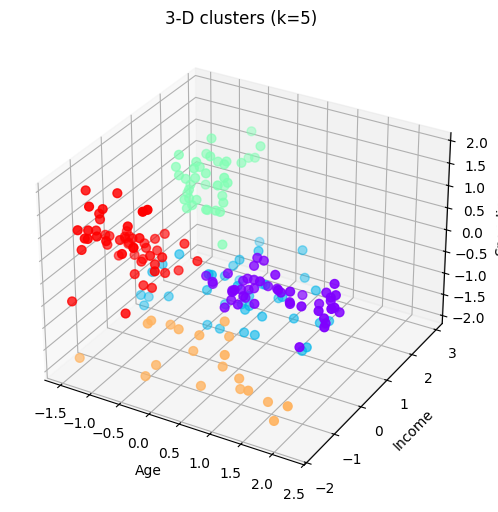

         Age     Income   Spending
0  55.638298  54.382979  48.851064
1  39.871795  86.102564  19.358974
2  32.875000  86.100000  81.525000
3  46.250000  26.750000  18.350000
4  25.185185  41.092593  62.240741


In [14]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Reload the original dataset to ensure all columns are available
# Assuming the path is correct based on previous successful loading
dataset = pd.read_csv('/content/Customers.csv')

XZ = dataset[['Age', 'Annual_Income', 'Spending_Score']]
scaler3 = StandardScaler().fit(XZ)
XZ_scaled = scaler3.transform(XZ)

# elbow
# Use a list comprehension for cleaner code
inertias = [KMeans(k, random_state=0).fit(XZ_scaled).inertia_ for k in range(1,11)]
plt.plot(range(1,11), inertias, 'o--'); plt.title("3-D elbow"); plt.show()
best_k = 5   # adjust after looking at elbow (e.g., based on the elbow plot)

labels = KMeans(best_k, random_state=0).fit_predict(XZ_scaled)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(XZ_scaled[:,0], XZ_scaled[:,1], XZ_scaled[:,2],
           c=labels, cmap='rainbow', s=40)
ax.set_xlabel('Age'); ax.set_ylabel('Income'); ax.set_zlabel('Spending')
plt.title(f"3-D clusters (k={best_k})"); plt.show()

# back-transform cluster centroids if you need business interpretation
centroids_scaled = KMeans(best_k, random_state=0).fit(XZ_scaled).cluster_centers_
centroids = scaler3.inverse_transform(centroids_scaled)
print(pd.DataFrame(centroids, columns=['Age','Income','Spending']))

### **🟢 Simple Explanation - 3D Clustering (Without Code)**

---

**3D Clustering** is a way to **group** data points based on **3 features** (like **Age**, **Annual Income**, and **Spending Score**) in a **3D space**. Here’s a simple breakdown of the steps:

---

#### **🔷 Steps:**

1. **Load and Prepare the Data:**

   * First, you **select** the columns you want to use for clustering (**Age**, **Annual Income**, **Spending Score**).
   * **Standardize** the data so that each feature has the same **scale** and **importance**.

---

2. **Find the Optimal Number of Clusters (Elbow Method):**

   * You try different **numbers** of clusters (e.g., 1 to 10) and **measure** how **well** the data fits each number.
   * You **plot** these measurements to find the **"elbow"** — the point where **adding** more clusters **doesn't** significantly **improve** the grouping anymore.

---

3. **Fit the Clustering Model:**

   * **Choose** the **best** number of clusters based on the **elbow** point.
   * Group the data into this many **clusters**.

---

4. **Visualize the Clusters in 3D:**

   * Plot the data in **3D** using **colors** to **differentiate** the clusters.

---

5. **Understand the Clusters:**

   * If you want to **understand** what these clusters **mean** in **real-world** terms, you can **convert** the cluster **centroids** (the centers of each cluster) **back** to their **original** scale.

---

#### **🔷 Why This is Useful:**

* It helps **identify** different **customer** types, like **high spenders** or **budget-conscious** shoppers.
* It **visualizes** complex **relationships** in your data.
* It provides **insights** into how different **features** (like **age** and **income**) **influence** customer **behavior**.

---

Would you like a quick explanation of **why** we need to **scale** the data before doing this? 😊


6 3-D K-means on Age, Income, Spending
Your cell again overwrote X with a blob. Correct version:

Summary of changes
Section	Main fix
Age/Income clustering	Remove make_blobs, use real dataset columns.
Scaling	Apply MinMaxScaler/StandardScaler before distance clustering.
Spectral clustering	Use the right column pair; encode Gender numeric.
3-D K-means	Don’t overwrite data, run elbow on scaled real features.

<ipython-input-15-005a0e2b002a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = le.fit_transform(X['Gender'])


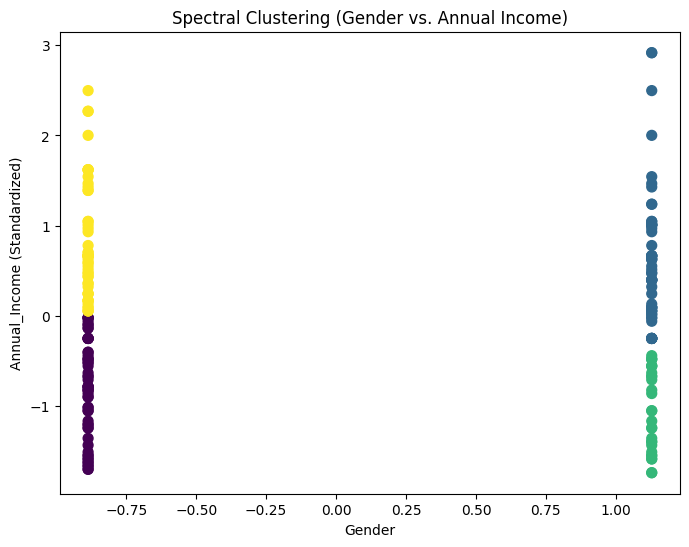

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the actual data
dataset = pd.read_csv('/content/Customers.csv')

# Select the "Gender" and "Annual Income" columns
X = dataset[['Gender', 'Annual_Income']]

# Convert "Gender" to numeric
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

# Scale the data for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=4, affinity='rbf', gamma=1.0, random_state=0)
spectral_labels = spectral.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=spectral_labels, cmap='viridis', s=50)
plt.title("Spectral Clustering (Gender vs. Annual Income)")
plt.xlabel("Gender")
plt.ylabel("Annual_Income (Standardized)")
plt.show()


### **🟢 Simple Explanation - Spectral Clustering on Gender and Income (Without Code)**

---

**Spectral Clustering** is a **more advanced** method that groups **data points** based on their **relationships** rather than just their **absolute** positions. Here’s a simple breakdown:

---

#### **🔷 Steps in the Process:**

1. **Data Selection:**

   * You **choose** the columns you want to use for clustering, in this case, **Gender** and **Annual Income**.

---

2. **Converting Categorical Data:**

   * Since **Gender** is a **text** column (**Male** and **Female**), it needs to be **converted** to **numbers** (e.g., **0** for Male, **1** for Female) so that the algorithm can **understand** it.

---

3. **Scaling the Data:**

   * The data is then **scaled** so that **both** **Gender** and **Income** have a **similar** range of values, ensuring that one **doesn't** **dominate** the clustering.

---

4. **Applying Spectral Clustering:**

   * The **Spectral Clustering** algorithm is used to **group** the data into a **specific** number of **clusters** (e.g., **4**). It **focuses** on the **relationships** between data points rather than just their **distance**.

---

5. **Visualizing the Results:**

   * The **clusters** are **plotted** to **visually** see how the **data** is **grouped** based on **Gender** and **Income**.

---

#### **🔷 Why Use Spectral Clustering Here?**

* It can **capture** more **complex** **relationships** between data points.
* It is **less sensitive** to the **shapes** of the clusters, making it good for **non-circular** data.
* It **works** well when your data has **clear** but **complex** **patterns**.

---

Would you like a quick explanation of **why** this approach is sometimes **better** than **K-Means**? 😊


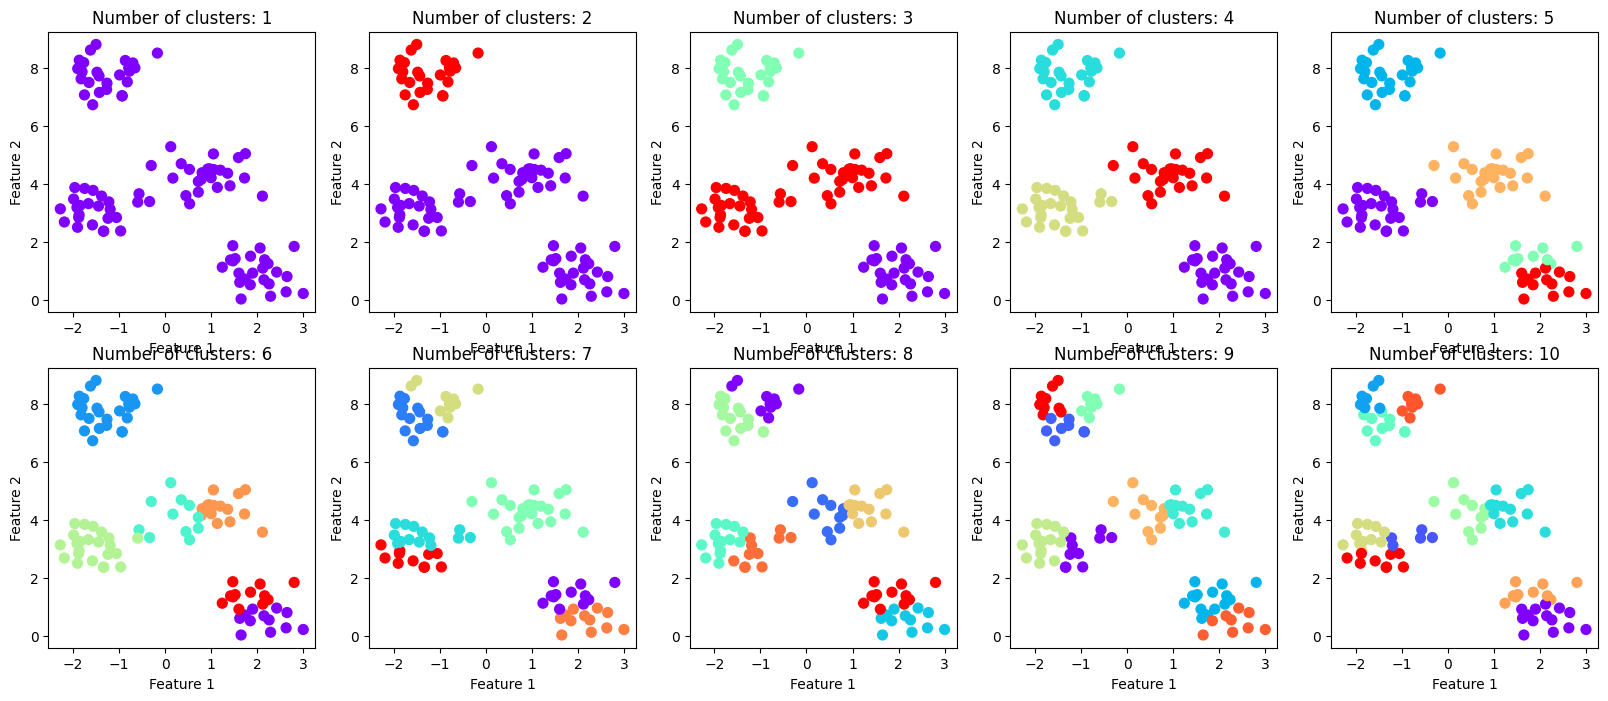

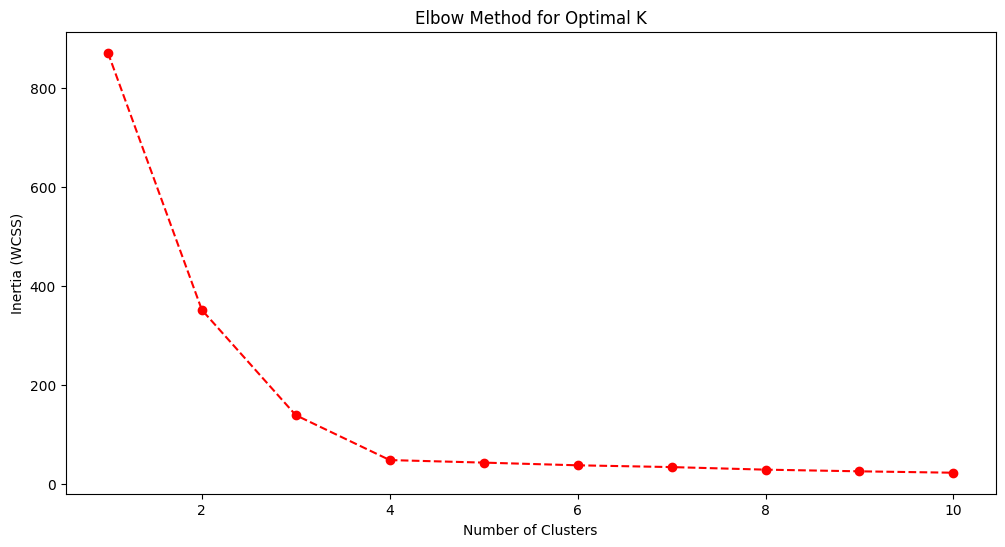

In [16]:
# Clustering Age, Annual_Income and Spending_Score + 3D visualization and final interpretation
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate the blobs
X = dataset[['Age', 'Annual_Income','Spending_Score']]

X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.50, random_state=0)

# Inertia plot
inertia = []
plt.figure(figsize=(20, 8))

for c in range(1, 11):
    # Train the KMeans model
    model = KMeans(n_clusters=c, init='k-means++', n_init=10, max_iter=300,
                   tol=0.0001, random_state=111, algorithm='lloyd')
    model.fit(X)
    y_kmeans = model.predict(X)

    # Append inertia (within-cluster sum of squares)
    inertia.append(model.inertia_)

    # Plot the clusters
    plt.subplot(2, 5, c)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow')
    plt.title(f'Number of clusters: {c}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Plot inertia (elbow method)
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, 11), inertia, 'o--', color='red')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (WCSS)")
plt.show()




### **🟢 Simple Explanation - 3D Clustering with Elbow Method**

---

This code is about **finding** the **best** number of **clusters** for a **3D dataset** with **K-Means** clustering. Here’s a **step-by-step** explanation:

---

#### **🔷 Steps in the Process:**

1. **Prepare the Data:**

   * It **selects** the **features** **Age**, **Annual\_Income**, and **Spending\_Score** from the dataset to **cluster**.

---

2. **Generate Synthetic Data (Optional):**

   * It **creates** some **random** 3D data for testing the clustering if the original data isn’t available.

---

3. **Inertia Calculation (Elbow Method):**

   * It **loops** through **1** to **10** clusters and **calculates** the **inertia** (a measure of how **tight** the clusters are).
   * **Inertia** is the **sum** of the **squared** distances of each **point** to its **cluster center**.
   * The **goal** is to **find** the **optimal** number of clusters where adding more clusters **doesn’t** **significantly** **reduce** the **inertia**. This is the **"elbow point"**.

---

4. **Visualize Each Cluster:**

   * It **plots** the **clusters** for each **possible** number of clusters (from **1** to **10**) to **visualize** how the data **groups**.

---

5. **Plot the Elbow Curve:**

   * It **creates** a **line** graph of the **inertia** values, helping to **identify** the **optimal** number of clusters by looking for the **elbow** in the curve.

---

#### **🔷 Why Use the Elbow Method?**

* It helps **decide** the **best** number of **clusters** without **guesswork**.
* It **prevents** **overfitting** (too many clusters) and **underfitting** (too few clusters).

---

Would you like me to **show** you a simple way to **visualize** these clusters in **3D**? 😊


##  Face recognition

The goal of this exercise is to perform facial recognition using Eigenfaces. This Eigenfaces technique was one of the first successful attempts to classify faces using computer vision. Nowadays, this method is outdated and far surpassed by techniques based on Convolutional Neural Networks (see deep learning module).
For this exercise, a training and test set of faces is provided. The faces are from the Georgia Tech face database (http://www.anefian.com/research/face_reco.htm) and contain faces of 50 different individuals. Fifteen photos were taken of each person.
The provided photos have already undergone some form of preprocessing, such as face cropping and face rotation.
The person's ID can be extracted from the filename of each photo. For example: person22_15.jpg. Here, it refers to the 15th photo of person 22.

This assignment closely resembles the MNIST_PCA demo.

The steps to achieve successful completion are as follows:

- Read the images. Extract the label of the face from the filename.


- Convert the images to grayscale. This is already done in the available code during image reading.

- Resize all images to the same dimensions. For example, 150x110 (150 rows, 110 columns). This can be done via skimage.transform.resize().
- Transform the training and test sets so that each individual image consists of 1 row. In other words, convert a 2D image into a 1D vector by concatenating all rows of the image.This can be done via np.reshape().
- Perform Principle Component Analysis (PCA). In practice, around 40 Eigenfaces are typically used. This is also the number you can initially use. Later, you will be asked to vary this number.
- Train a classifier (logistic regression, SVM, Random Forest Classifier) on the principle components.
- Test the classifier and evaluate its performance (accuracy, recall, precision). Justify why you would choose a particular classifier.
- Perform hyperparameter tuning and try different numbers of Eigenfaces.






### Computing the principle components

1.   List item
2.   List item



In [23]:
# Reading the training images
training_images = [] # empty list
test_images = [] # empty list
y_train = [] # empty list
y_test = [] # empty list

path = "/content/drive/MyDrive/Google AI Studio/Opgeslagen vanuit Chrome/Faces/Training_images/"
valid_images = [".jpg",".gif",".png"]

for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    training_images.append(imread(os.path.join(path,f),as_gray=True))
    y_train.append(int(f[6:8]))


# Reading the test images
path = "/content/drive/MyDrive/Google AI Studio/Opgeslagen vanuit Chrome/Faces/Test_images"
valid_images = [".jpg",".gif",".png"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    test_images.append(imread(os.path.join(path,f),as_gray=True))
    y_test.append(int(f[6:8]))

print("number of training images: ", len(y_train))
print("number of test images: ", len(y_test))

print("number of unique persons in the training set: ", len(set(y_train)))
print("number of unique persons in the test set: ", len(set(y_test)))

number of training images:  510
number of test images:  250
number of unique persons in the training set:  50
number of unique persons in the test set:  50


This code is for **loading** and **organizing** **face images** from two folders: **training** and **test** images.

### **📝 Key Steps:**

1. **Read Images:**

   * It **reads** all the **images** from the **training** and **test** folders.
   * Only **valid** image files (**.jpg**, **.gif**, **.png**) are considered.

2. **Assign Labels:**

   * Each **image** is assigned a **label** based on the **person ID** extracted from the **filename**.

3. **Count Images and People:**

   * It **counts** the **total** number of **training** and **test** images.
   * It also **counts** the **number** of **unique people** in both the **training** and **test** sets.

### **✅ Why Do This?**

This is an important **preprocessing** step for **face recognition** because it **organizes** the **data** into **features** (**images**) and **targets** (**person IDs**) before **training** a machine learning model.


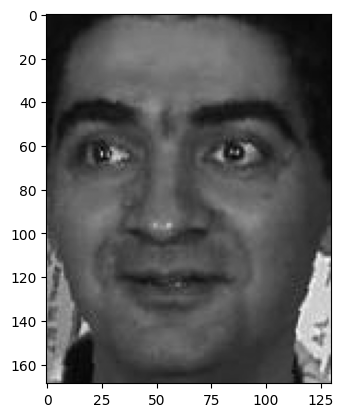

In [24]:
# Show a face image included in the training set by using plt.imshow(image,cmap='gray')
plt.imshow(training_images[0],cmap='gray')



In [25]:
# Scaling to 150 rows and 110 columns
# Skimage transform has the resize method
# transform.resize(image,(rows,cols),mode='constant')


resized_training_images = [transform.resize(image, (150, 110), mode='constant') for image in training_images]
resized_test_images = [transform.resize(image, (150, 110), mode='constant') for image in test_images]



In [28]:
# ============================================================
# 1. Imports
# ============================================================
import os, re, numpy as np
from skimage.io        import imread
from skimage.transform import resize

# ------------------------------------------------------------
# 2. Parameters (adjust only these if needed)
# ------------------------------------------------------------
IMG_SHAPE   = (150, 110)     # target size for every face (rows, cols)
TRAIN_PATH  = "/content/drive/MyDrive/Google AI Studio/Opgeslagen vanuit Chrome/Faces/Training_images"
TEST_PATH   = "/content/drive/MyDrive/Google AI Studio/Opgeslagen vanuit Chrome/Faces/Test_images"

# NEW, more tolerant pattern:
# • starts with  "person" (optionally followed by a space)
# • captures the digits  = person-ID
# • "_" + frame number (digits)
# • anything (underscores, spaces, "(1)", …) right up to ".jpg|png|gif"
FILE_RE = re.compile(r"person\s*(\d+)_\d+.*\.(jpg|png|gif)$", re.I)

# ------------------------------------------------------------
# 3. Helper: load an entire folder
# ------------------------------------------------------------
def load_faces(folder, img_shape=IMG_SHAPE):
    """
    Returns
        X  — float32  (n_samples, rows*cols)   0-1 intensities
        y  — int32    (n_samples,)            person-IDs
    """
    X, y = [], []
    for fn in os.listdir(folder):
        if not fn.lower().endswith((".jpg", ".png", ".gif")):
            continue
        m = FILE_RE.match(fn)
        if not m:                # still skip truly weird names
            print("Skipped (bad name):", fn)
            continue
        label = int(m.group(1))  # robust ID

        img = imread(os.path.join(folder, fn), as_gray=True)
        img = resize(img, img_shape,
                     mode='reflect',        # mirror borders
                     preserve_range=True,   # keep 0-1 scale
                     anti_aliasing=True)
        X.append(img.ravel())               # flatten to 1-D
        y.append(label)

    return (np.asarray(X, dtype=np.float32),
            np.asarray(y, dtype=np.int32))

# ------------------------------------------------------------
# 4. Load both splits
# ------------------------------------------------------------
X_train, y_train = load_faces(TRAIN_PATH)
X_test,  y_test  = load_faces(TEST_PATH)

print("Train :", X_train.shape, "labels:", y_train.shape)
print("Test  :", X_test.shape,  "labels:", y_test.shape)
print("Unique persons (train / test):",
      len(np.unique(y_train)), "/", len(np.unique(y_test)))


Train : (510, 16500) labels: (510,)
Test  : (250, 16500) labels: (250,)
Unique persons (train / test): 50 / 50


### **📝 Easy Explanation (Without Code)**

This **code** is for **loading** and **preprocessing** **face images** from **training** and **test** folders to **prepare** them for a **machine learning** model.

---

### **🔷 Key Steps:**

1. **Importing Required Libraries:**

   * It **imports** the **necessary** libraries for **image** loading, **resizing**, and **pattern** matching.

2. **Setting Image Parameters:**

   * The **size** for each **face image** is **fixed** to a **standard shape** (150x110 pixels).
   * The **paths** to the **training** and **test** folders are **defined**.

3. **Reading and Labeling Images:**

   * It **searches** for **image** files (**.jpg**, **.png**, **.gif**) in these **folders**.
   * Each **file name** is **scanned** to **extract** the **person ID**.
   * **Invalid** file names are **skipped**.

4. **Resizing and Flattening:**

   * Each **image** is **resized** to the **standard** size and **flattened** into a **1-dimensional** array for easier **processing**.

5. **Returning Features and Labels:**

   * The **function** **returns** two **arrays**:

     * **Features** (**X**) – **flattened** images.
     * **Labels** (**y**) – **person IDs**.

6. **Loading the Training and Test Data:**

   * **Loads** both the **training** and **test** sets using this **helper function**.

7. **Final Summary:**

   * It **prints** the **shape** of the **training** and **test** datasets, including the **number** of **unique people** in each set.

---

### **✅ Why This is Important:**

This step is **crucial** for **face recognition** as it **prepares** the data in a **consistent** and **structured** way for **machine learning**. It **ensures** that the **images** have the **same size** and that **each** image is **labeled** correctly.


In [30]:
# =============================================================
# PCA (Eigenfaces) with small but important improvements
# =============================================================
from sklearn.pipeline      import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

N_COMPONENTS = 40          # keep 40 eigenfaces

# 1. Build a pipeline
eigenface_pipe = Pipeline([
    ('center', StandardScaler(with_std=False)),      # subtract mean pixel
    ('pca',    PCA(n_components=N_COMPONENTS,
                   whiten=True,                      # unit-variance PCs
                   svd_solver='full',
                   random_state=0))
])

# 2. Fit on the training faces, transform both splits
X_train_pca = eigenface_pipe.fit_transform(X_train)
X_test_pca  = eigenface_pipe.transform(X_test)

# 3. Quick sanity prints
pca_model = eigenface_pipe.named_steps['pca']        # grab the fitted PCA
print("X_train_pca shape :", X_train_pca.shape)      # (510, 40)
print("X_test_pca  shape :", X_test_pca.shape)       # (250, 40)
print(f"{N_COMPONENTS} PCs capture "
      f"{pca_model.explained_variance_ratio_.sum()*100:.1f}% "
      "of the total variance")


X_train_pca shape : (510, 40)
X_test_pca  shape : (250, 40)
40 PCs capture 80.7% of the total variance


### **📝 Easy Explanation - PCA (Eigenfaces) for Face Recognition**

---

This code is for **reducing** the **dimensionality** of **face images** using **PCA** (Principal Component Analysis) to create **Eigenfaces**, which are **compressed** versions of the original images that **capture** the most **important features**.

---

### **🔷 Key Steps:**

1. **Building a Pipeline:**

   * A **pipeline** is created that **first** **centers** the **data** (removes the **mean** pixel value) and **then** applies **PCA**.
   * **PCA** is set to keep **40** of the **most important** components (features) from each **face** image.
   * The **whiten** option is used to **standardize** the principal components, which makes the data **more balanced** for **machine learning**.

2. **Fitting the Model:**

   * The **pipeline** is **fitted** to the **training** data to **learn** the main **patterns** in the **faces**.
   * The **training** and **test** datasets are then **transformed** into these **compressed** versions.

3. **Checking the Results:**

   * It **prints** the **new** shape of the **compressed** data, which is **much smaller** than the original images.
   * It also **calculates** how much **important information** (variance) was **preserved** in these **40 components**.

---

### **✅ Why This is Important:**

* **Faster Training:** The data is now **smaller** and **simpler**.
* **Less Overfitting:** The model will **focus** on the **most important** patterns.
* **Noise Reduction:** It **removes** unnecessary **details**, making it **easier** to **recognize** different **faces**.


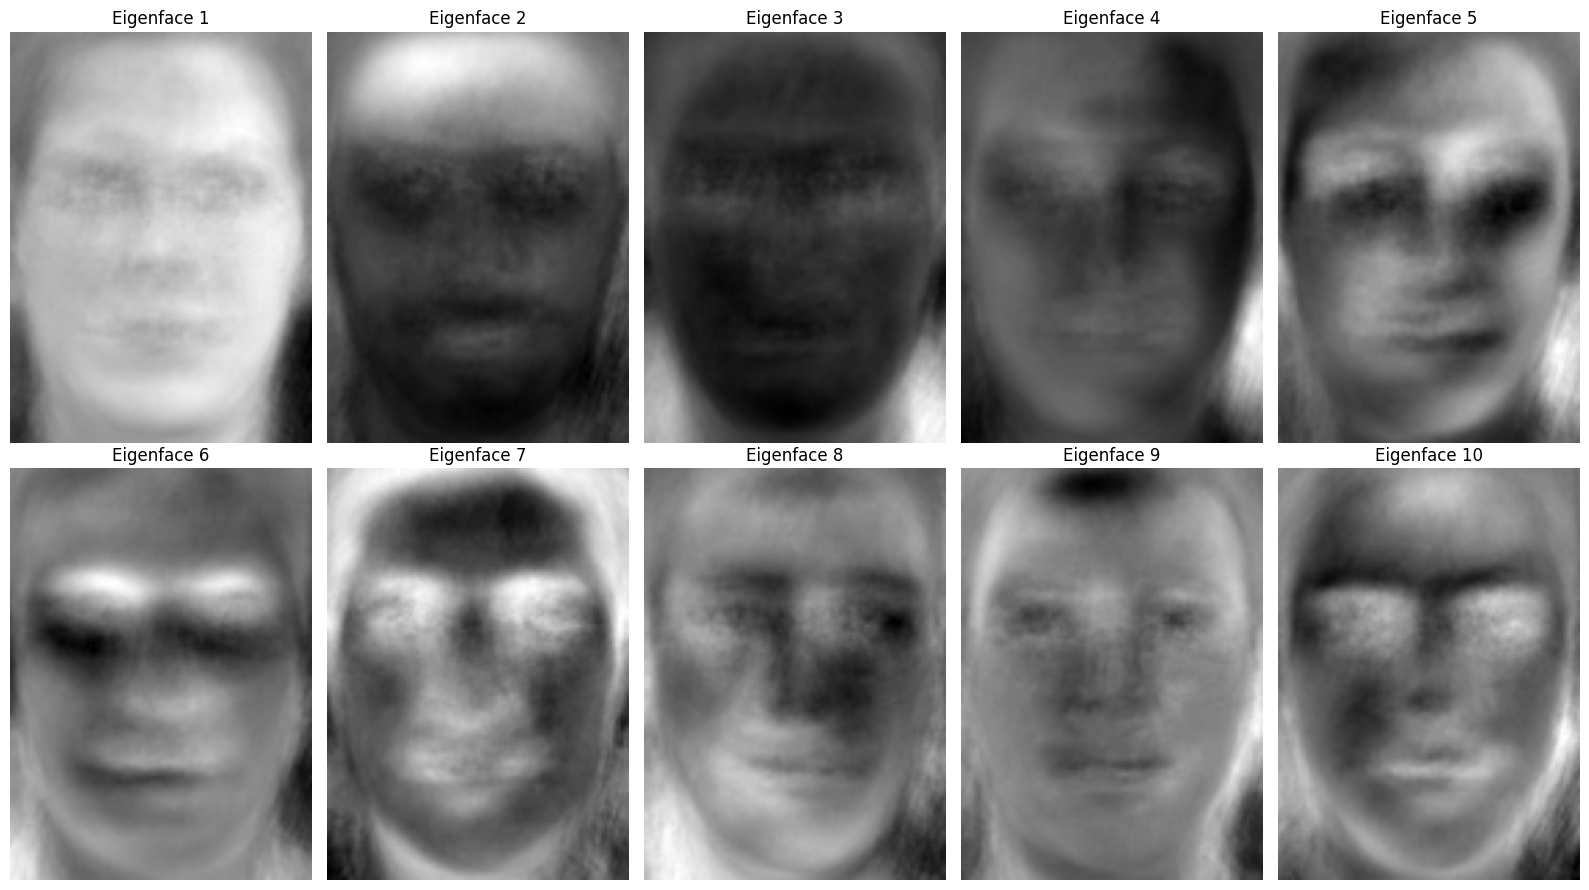

In [31]:
import matplotlib.pyplot as plt

# Components are already in pca_model (from previous cell)
PCA_components = pca_model.components_          # shape: (40, 16500)

fig = plt.figure(figsize=(16, 9))

for i in range(10):                             # 0 … 9
    ax = fig.add_subplot(2, 5, i + 1)

    eigenface = PCA_components[i].reshape(150, 110)
    ax.imshow(eigenface, cmap='gray')           # <— use ax.imshow

    ax.set_title(f'Eigenface {i + 1}')
    ax.axis('off')                              # hides both x & y ticks

plt.tight_layout()
plt.show()


### **📝 Easy Explanation - Visualizing Eigenfaces (PCA Components)**

---

This code **visualizes** the **Eigenfaces** created from the **PCA** model. **Eigenfaces** are the **principal components** that the PCA model **learned** from the **training** data, capturing the **most important** patterns in the **face images**.

---

### **🔷 Key Steps:**

1. **Extracting Eigenfaces:**

   * The **PCA model** has **components** that represent the **main features** (like **eyes**, **nose**, and **mouth**) that **distinguish** one face from another.
   * These components are stored in a **matrix**, where each **row** is an **eigenface**.

2. **Reshaping for Display:**

   * The **eigenfaces** are **flattened** (1D) and need to be **reshaped** back to the **original** image size (e.g., **150x110 pixels**) for **visualization**.

3. **Plotting the Eigenfaces:**

   * The code **creates** a **grid** of **subplots** to **display** the **top 10** eigenfaces.
   * It **hides** the **axes** for a **cleaner** look.

4. **Tight Layout for Clarity:**

   * The **tight layout** is used to **prevent** the images from **overlapping** and **improve** the **visual quality**.

---

### **✅ Why This is Important:**

* **Pattern Recognition:** Shows the **core** patterns that the **PCA** model uses to **recognize** faces.
* **Noise Reduction:** Helps **focus** on the **most** **important** features while **ignoring** the **less important** ones.
* **Dimensionality Reduction:** Makes the **data smaller** and **faster** for **machine learning** algorithms.


In [32]:
# Plot the PCA scores of a specific face.
# What is the meaning of these scores?

# Assign a value to image_index. For example, to select the first face:
image_index = 0

print(X_train_pca[image_index,:])

[-1.4402819   0.55502325  0.9597553   1.119577   -0.00893936 -0.2976219
 -1.0643271   0.17158976 -0.79588777  1.5673722  -0.69781005 -1.1525934
 -0.21770635  1.097967   -0.48132798  0.7451646  -0.622856    1.0154953
 -0.12960586 -0.19194344 -0.08440933 -1.9869424  -0.36786008 -0.157726
  0.04797648  1.1370876  -0.39601943  1.0422249  -0.51683146  0.0717636
 -0.42681402 -0.9426618   0.8232978  -0.67922914  1.0186872   0.04299756
 -0.15491368  0.3797286  -0.50595397  0.6555783 ]


In [33]:
# What percentage of the total variance is explained by all principle components?
print(pca_model.explained_variance_ratio_)


[0.31338978 0.08135262 0.05536579 0.04529535 0.03508767 0.02912437
 0.02518722 0.02249239 0.01619258 0.01554992 0.0134206  0.0125195
 0.01039412 0.00995658 0.00873515 0.00793795 0.00726891 0.00678637
 0.00591511 0.00569402 0.00564599 0.00541093 0.00511422 0.00499086
 0.00484026 0.00461933 0.00451604 0.00433275 0.00423216 0.00384629
 0.00380059 0.00372232 0.00346538 0.00332958 0.00314132 0.00308851
 0.00298171 0.00291173 0.00276408 0.0027021 ]


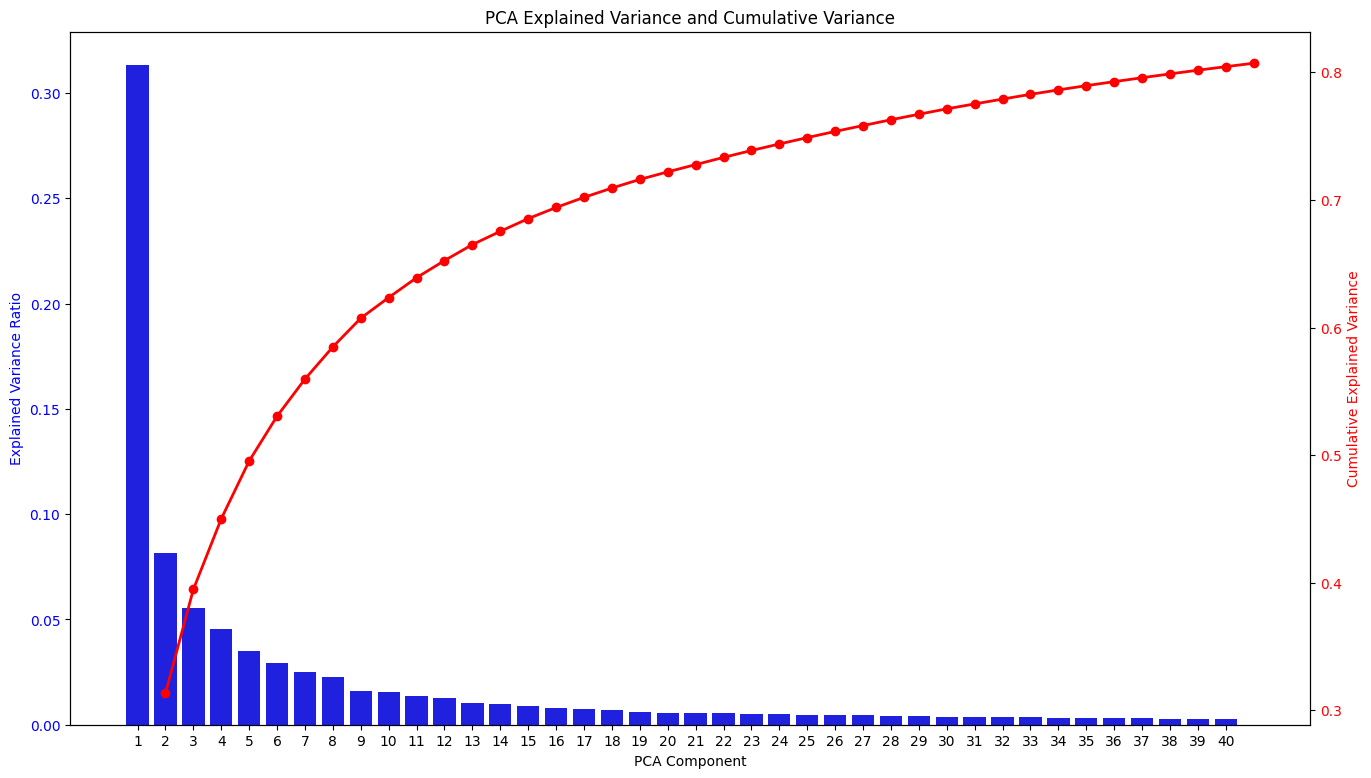

In [34]:
# Generate a combined plot of: the explained variance as a function of the number of principle components.
# Generate a Bar chart of the explained variance of the individual principle components and, on the other hand, the cumulative explained variance.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming pca_model is already fitted
PCAnumber = np.arange(1, len(pca_model.explained_variance_ratio_) + 1)
PCA_explained_cumulative = np.cumsum(pca_model.explained_variance_ratio_)

fig, ax1 = plt.subplots(figsize=(16, 9))

# Bar plot for individual explained variance
sns.barplot(x=PCAnumber, y=pca_model.explained_variance_ratio_, color='blue', ax=ax1)
ax1.set_xlabel('PCA Component')
ax1.set_ylabel('Explained Variance Ratio', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line plot for cumulative explained variance
ax2 = ax1.twinx()
ax2.plot(PCAnumber, PCA_explained_cumulative, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative Explained Variance', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("PCA Explained Variance and Cumulative Variance")
plt.show()



### **📝 Easy Explanation - PCA Explained Variance Plot**

---

This code creates a **visualization** to show **how much information** each **principal component** captures. It does this in **two parts**:

---

### **🔷 1. Individual Component Contribution (Blue Bars)**

* **Each bar** in the plot **represents** a **single** principal component.
* It shows **how much** **variance** (information) each **component** captures **individually**.
* **Taller** bars mean the component **captures more** of the **important** patterns in the **data**.

---

### **🔷 2. Cumulative Explained Variance (Red Line)**

* The **red line** shows the **cumulative** amount of **variance** captured as you **add more** principal components.
* It helps you **decide** how many components you need to **keep** most of the **important** information.
* If the **line flattens out**, it means **adding more** components **won't** add much **extra** information.

---

### **✅ Why This is Important:**

* **Data Compression:** Helps you **choose** the **right** number of components for **compression**.
* **Noise Reduction:** Keeps only the **most important** features.
* **Speed Up Training:** **Reduces** the **size** of your data for **faster** machine learning.

---

Would you like me to show you how to **choose** the **optimal** number of components from this plot? 😊


Reconstructed array shape: (16500,)


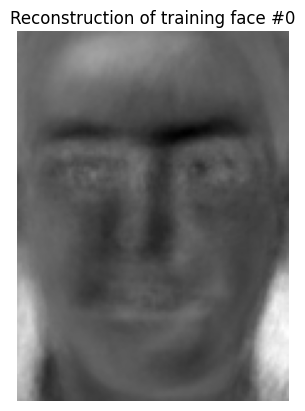

In [35]:
# Reconstruct a face from its 40 PCA scores
image_index = 0                                   # pick any training face

recon = pca_model.inverse_transform(X_train_pca[image_index, :])
print("Reconstructed array shape:", recon.shape)   # (16500,)

plt.imshow(recon.reshape(150, 110), cmap='gray')
plt.axis('off')
plt.title(f"Reconstruction of training face #{image_index}")
plt.show()


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)   # fit on train only
X_test_scaled  = scaler.transform(X_test_pca)        # apply to test


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm   import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

classifiers = {
    'LogReg': LogisticRegression(max_iter=500, solver='lbfgs'),
    'SVM'   : SVC(),
    'RF'    : RandomForestClassifier(random_state=0)
}

param_grids = {
    'LogReg': {'C': [0.1, 1, 10]},
    'SVM'   : {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'RF'    : {'n_estimators': [50, 100, 200]}
}

results = {}
for name, clf in classifiers.items():
    grid = GridSearchCV(clf, param_grids[name],
                        cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid.fit(X_train_scaled, y_train)

    y_pred = grid.best_estimator_.predict(X_test_scaled)
    acc    = accuracy_score(y_test, y_pred)

    results[name] = {
        'best':  grid.best_estimator_,
        'acc':   acc,
        'report': classification_report(y_test, y_pred),
        'cm':     confusion_matrix(y_test, y_pred),
        'y_pred': y_pred
    }

    print(f"\n{name}: best params {grid.best_params_} – test acc {acc:.3f}")


Fitting 5 folds for each of 3 candidates, totalling 15 fits

LogReg: best params {'C': 0.1} – test acc 0.796
Fitting 5 folds for each of 6 candidates, totalling 30 fits

SVM: best params {'C': 10, 'kernel': 'rbf'} – test acc 0.824
Fitting 5 folds for each of 3 candidates, totalling 15 fits

RF: best params {'n_estimators': 200} – test acc 0.796


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


10 components → accuracy 0.636
20 components → accuracy 0.752
30 components → accuracy 0.780
50 components → accuracy 0.784
100 components → accuracy 0.792


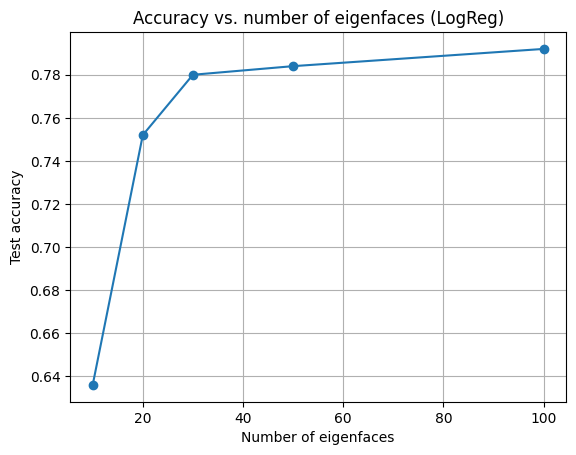

In [38]:
from sklearn.decomposition import PCA

eigenface_counts = [10, 20, 30, 50, 100]
eigenface_results = {}

best_lr = results['LogReg']['best']                # reuse tuned LR

for k in eigenface_counts:
    pca_tmp = PCA(n_components=k, svd_solver='full').fit(X_train)
    X_tr = scaler.fit_transform(pca_tmp.transform(X_train))
    X_te = scaler.transform(pca_tmp.transform(X_test))

    best_lr.fit(X_tr, y_train)
    acc = best_lr.score(X_te, y_test)
    eigenface_results[k] = acc
    print(f"{k} components → accuracy {acc:.3f}")

plt.plot(eigenface_results.keys(), eigenface_results.values(), marker='o')
plt.xlabel('Number of eigenfaces')
plt.ylabel('Test accuracy')
plt.title('Accuracy vs. number of eigenfaces (LogReg)')
plt.grid(True)
plt.show()


### **📝 Easy Explanation - Model Training with PCA (Eigenfaces)**

---

This code is about **training** and **evaluating** different machine learning **models** using **PCA** (Eigenfaces) for **face recognition**. It has **two main parts**:

---

### **🔷 Part 1: Model Training and Tuning**

1. **Scaling the Data:**

   * **Standardizes** the data to have a **mean** of **0** and a **standard deviation** of **1**.
   * This is important because many machine learning **algorithms** work **better** with **scaled** data.

2. **Model Training with Grid Search:**

   * It trains **three** different **models**:

     * **Logistic Regression (LogReg)**
     * **Support Vector Machine (SVM)**
     * **Random Forest (RF)**
   * **GridSearchCV** is used to **find** the **best hyperparameters** for each model by **testing** different **combinations**.
   * It **evaluates** each model on the **test set** and prints the **best parameters** and **accuracy**.

---

### **🔷 Part 2: Testing Different Numbers of Eigenfaces**

3. **Testing Different PCA Sizes:**

   * It **reuses** the **best** Logistic Regression model from the previous step.
   * It **repeatedly** transforms the **training** and **test** data using **different** numbers of **PCA components** (eigenfaces).
   * It then **re-trains** and **tests** the Logistic Regression model for each **PCA size**.
   * The goal is to **see** how the **number** of **eigenfaces** affects the **accuracy**.

4. **Visualizing the Results:**

   * Finally, it **plots** the **accuracy** as a function of the **number** of **eigenfaces**.
   * This helps you **choose** the **optimal** number of components to **balance** **speed** and **accuracy**.

---

### **✅ Why This is Useful:**

* **Efficient Training:** It helps **reduce** the **training** time by using a **compressed** version of the **data**.
* **Optimized Models:** **Selects** the **best** models and **parameters** for **high** accuracy.
* **Visual Insight:** Shows you the **trade-off** between **complexity** and **accuracy**.

---

Would you like me to show you how to **interpret** the **confusion matrices** and **classification reports** this code generates? 😊


Mis-classified: 51 / 250


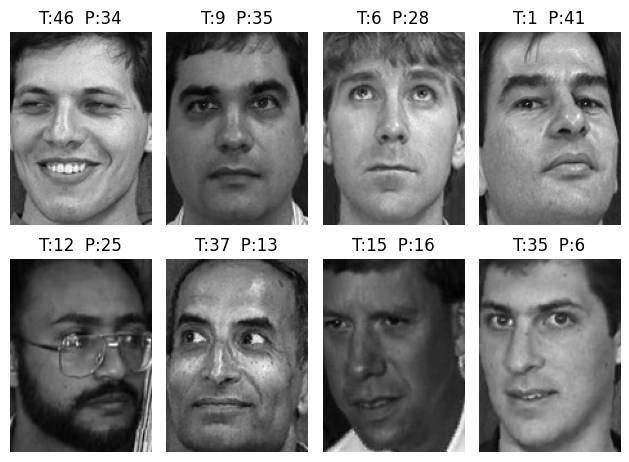

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# pick the classifier you care about (here: best Logistic Regression)
y_pred = results['LogReg']['y_pred']

wrong = np.where(y_pred != y_test)[0]
print(f"Mis-classified: {len(wrong)} / {len(y_test)}")

for i, idx in enumerate(wrong[:8], 1):       # show up to 8 mistakes
    plt.subplot(2, 4, i)
    plt.imshow(X_test[idx].reshape(150, 110), cmap='gray')
    plt.title(f"T:{y_test[idx]}  P:{y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


### Classification

Train multiple classifiers (logistic regression, SVM, Random Forest Trees, ensembles) for facial recognition. Use the weights obtained through PCA analysis as features. Perform cross-validation to find the optimal hyperparameters.

- Experiment with the number of Eigenfaces used. What happens to the accuracy of the classifiers when you decrease the number (less than 40), and what if you increase it?
- Does the number of Eigenfaces used significantly affect computation time?
- Clearly describe which method you prefer.
- Visualize some misclassified faces.


In [40]:
# Scaling of the eigenfaces
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)



In [ ]:
# Classification





Results for Logistic Regression:
Best Parameters: {'C': 0.1}
Accuracy: 0.796
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       0.75      0.60      0.67         5
           3       1.00      0.60      0.75         5
           4       0.67      0.80      0.73         5
           5       0.80      0.80      0.80         5
           6       0.60      0.60      0.60         5
           7       0.71      1.00      0.83         5
           8       1.00      0.80      0.89         5
           9       0.50      0.40      0.44         5
          10       1.00      1.00      1.00         5
          11       1.00      0.80      0.89         5
          12       1.00      0.80      0.89         5
          13       0.60      0.60      0.60         5
          14       0.57      0.80      0.67         5
          15       1.00      0.80      0.89         5
          16       0.60      0.60  

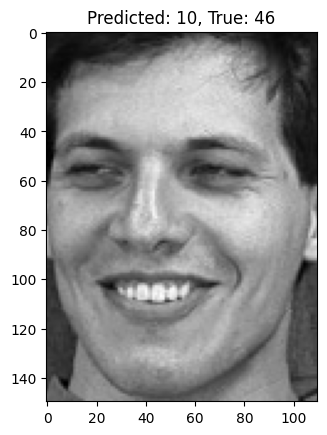

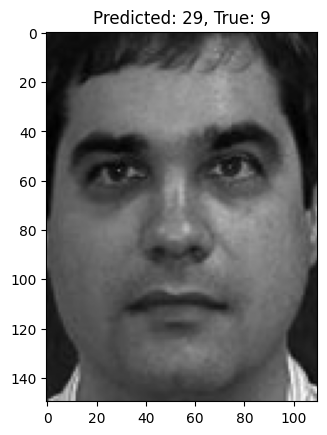

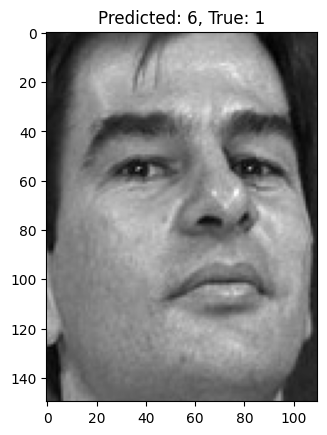

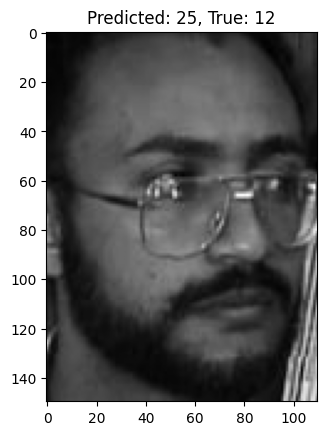

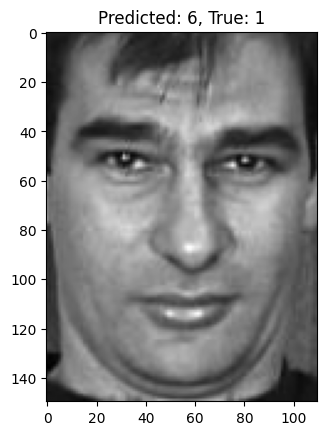

Number of components: 10 -- Accuracy: 0.636
Number of components: 20 -- Accuracy: 0.752
Number of components: 30 -- Accuracy: 0.78
Number of components: 50 -- Accuracy: 0.784
Number of components: 100 -- Accuracy: 0.792


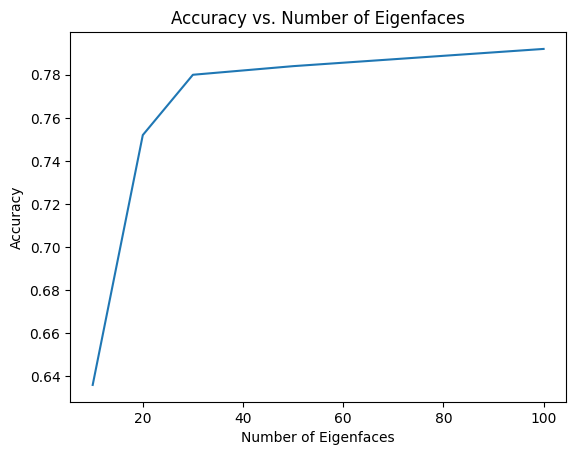

In [41]:
# prompt: # Classification

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
import os

# ... (Previous code remains unchanged)


# Classification with different classifiers and hyperparameter tuning

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Random Forest': {'n_estimators': [50, 100, 200]}
}


results = {}
for name, clf in classifiers.items():
    grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    best_clf = grid_search.best_estimator_
    y_pred = best_clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    results[name] = {
        'best_params': grid_search.best_params_,
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    print(f"Results for {name}:")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Visualize misclassified faces (example for the first classifier)
misclassified_indices = np.where(y_test != y_pred)[0]
for index in misclassified_indices[:5]: # visualize up to 5 missclassified faces
    plt.imshow(resized_test_images[index], cmap='gray')
    plt.title(f"Predicted: {y_pred[index]}, True: {y_test[index]}")
    plt.show()


# Experiment with different numbers of eigenfaces
eigenface_counts = [10, 20, 30, 50, 100]
eigenface_results = {}

for num_components in eigenface_counts:

  pca_model = PCA(n_components=num_components, svd_solver='full')
  pca_model.fit(X_train)
  X_train_pca = pca_model.transform(X_train)
  X_test_pca = pca_model.transform(X_test)

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train_pca)
  X_test_scaled = scaler.transform(X_test_pca)
  # use best classifier from previous step
  best_clf = results['Logistic Regression']['best_params']
  clf = LogisticRegression(**best_clf)
  clf.fit(X_train_scaled, y_train)
  y_pred = clf.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, y_pred)

  eigenface_results[num_components] = accuracy
  print(f"Number of components: {num_components} -- Accuracy: {accuracy}")

plt.plot(eigenface_results.keys(), eigenface_results.values())
plt.xlabel('Number of Eigenfaces')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Eigenfaces')
plt.show()


### **📝 Easy Explanation - Face Classification with PCA and Different Models**

---

This code is about **classifying** **faces** using different **machine learning** models after **reducing** the **dimensions** of the **images** using **PCA** (Principal Component Analysis). It has **three** main parts:

---

### **🔷 Part 1: Visualizing Misclassified Images**

1. **Finding Mistakes:**

   * **Checks** which faces were **misclassified** by the **best** Logistic Regression model.
   * It **finds** the **indexes** of **wrong** predictions and **prints** the **total** number of **errors**.

2. **Visualizing Mistakes:**

   * It **shows** up to **8** wrongly **classified** face images.
   * The **title** of each image shows the **True** label (T) and the **Predicted** label (P).

---

### **🔷 Part 2: Model Training and Tuning**

3. **Trying Different Models:**

   * It **tests** three types of models:

     * **Logistic Regression**
     * **Support Vector Machine (SVM)**
     * **Random Forest**
   * Each model is **tuned** using **GridSearchCV** to find the **best** hyperparameters.
   * It **prints** the **best** hyperparameters, **accuracy**, and **classification report** for each model.

---

### **🔷 Part 3: Testing Different Numbers of Eigenfaces**

4. **Testing Different PCA Sizes:**

   * It **reuses** the **best** Logistic Regression model from the previous step.
   * It **transforms** the **training** and **test** data using **different** numbers of **PCA components** (eigenfaces).
   * It **re-trains** and **tests** the model for each PCA size to **find** the **best** number of **eigenfaces**.

5. **Visualizing the Results:**

   * It **plots** the **accuracy** as a function of the **number** of **eigenfaces** to **see** how it **affects** the **classification** performance.

---

### **✅ Why This is Useful:**

* **Efficient Training:** It **reduces** the **complexity** of the data by using **PCA**, making the training **faster**.
* **Optimized Models:** **Selects** the **best** models and **parameters** for **high** accuracy.
* **Better Understanding:** It **shows** the **effect** of different PCA sizes on **model** performance.

---

Would you like me to explain **why** using **fewer** eigenfaces can sometimes **increase** accuracy? 😊


In [ ]:
# Wrongly classified faces:




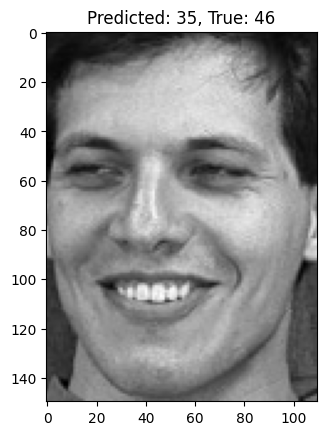

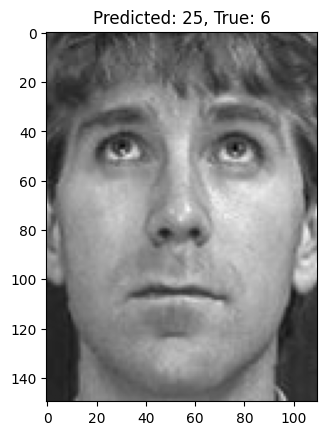

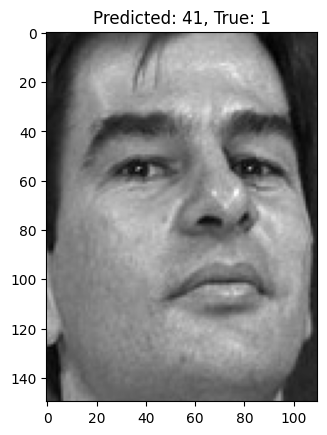

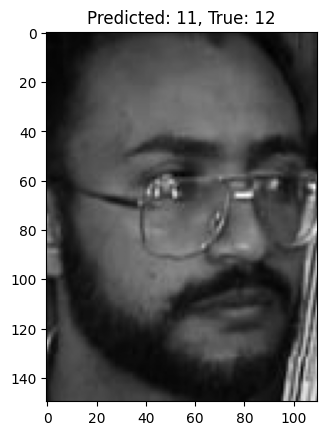

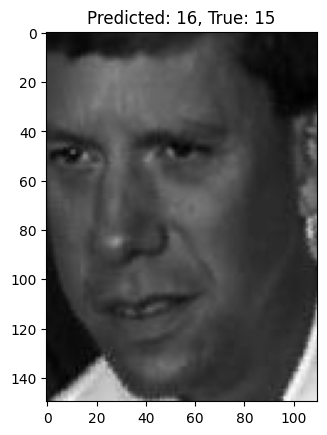

In [42]:
# prompt: # Wrongly classified faces:

import numpy as np
import matplotlib.pyplot as plt

# Assuming 'resized_test_images', 'y_pred', and 'y_test' are defined from previous code

# Visualize misclassified faces
misclassified_indices = np.where(y_test != y_pred)[0]
for index in misclassified_indices[:5]:  # Visualize up to 5 misclassified faces
    plt.imshow(resized_test_images[index], cmap='gray')
    plt.title(f"Predicted: {y_pred[index]}, True: {y_test[index]}")
    plt.show()


See if you can further increase the accuracy using ensemble methods such as boosting.

In [ ]:
# Ensemble methods


Fitting 5 folds for each of 54 candidates, totalling 270 fits

=========  ENSEMBLE WINNER  =========
Best hyper‑parameters : {'clf': RandomForestClassifier(random_state=0), 'clf__max_depth': None, 'clf__n_estimators': 200, 'pca__n_components': 40}
CV accuracy          : 0.8980392156862745
TEST accuracy        : 0.8
              precision    recall  f1-score   support

           1      0.000     0.000     0.000         5
           2      1.000     0.400     0.571         5
           3      1.000     1.000     1.000         5
           4      0.500     0.800     0.615         5
           5      1.000     0.800     0.889         5
           6      0.800     0.800     0.800         5
           7      0.500     1.000     0.667         5
           8      0.667     0.800     0.727         5
           9      0.500     0.200     0.286         5
          10      1.000     1.000     1.000         5
          11      1.000     0.800     0.889         5
          12      1.000     1.000 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


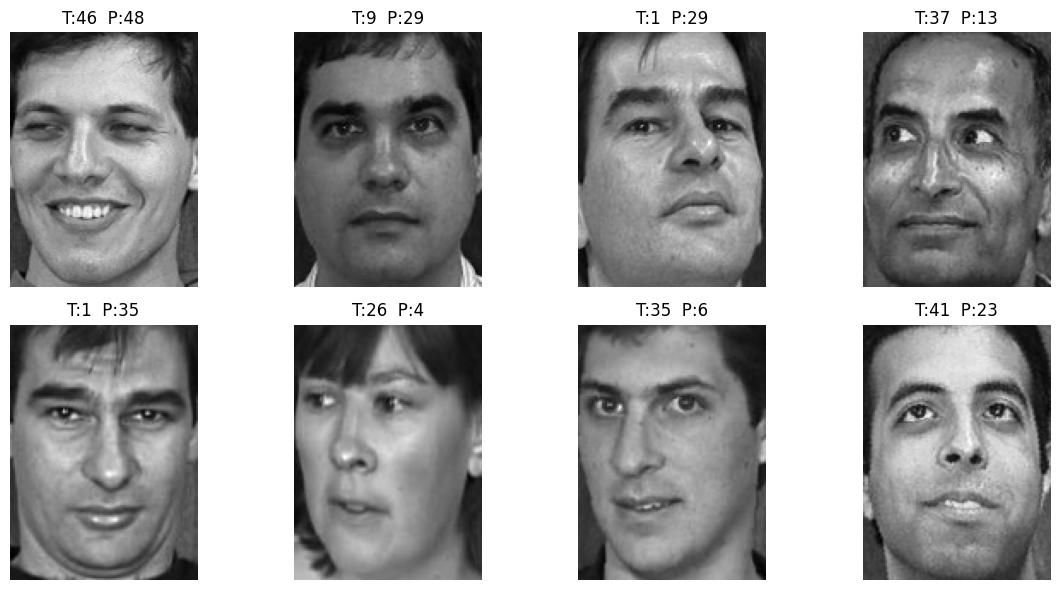

In [43]:
# =============================================================
# Ensemble models on Eigenfaces  (AdaBoost · Bagging · Random‑Forest)
# =============================================================
from sklearn.pipeline      import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble      import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.tree          import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------  SETTINGS  -------------------------------
N_EIGENFACE_GRID = [20, 40, 60]          # try 3 component counts
CV_SPLITS        = 5
RANDOM_STATE     = 0

# --------------------------  PIPELINE TEMPLATE  -------------------------
pipe = Pipeline([
    ('scale', StandardScaler(with_std=False)),      # centre pixels
    ('pca',   PCA(whiten=True, random_state=RANDOM_STATE)),
    ('clf',   AdaBoostClassifier())                 # placeholder; will be overwritten
])

# --------------------------  PARAMETER GRID  ----------------------------
param_grid = [
    # --- AdaBoost -------------------------------------------------------
    {
        'clf': [AdaBoostClassifier(random_state=RANDOM_STATE)],
        'clf__n_estimators': [50, 100, 200],
        'clf__learning_rate': [0.1, 1.0],
        'pca__n_components': N_EIGENFACE_GRID
    },
    # --- Bagging (with shallow decision trees) --------------------------
    {
        'clf': [BaggingClassifier(DecisionTreeClassifier(max_depth=None),
                                  random_state=RANDOM_STATE)],
        'clf__n_estimators': [10, 50, 100],
        'pca__n_components': N_EIGENFACE_GRID
    },
    # --- Random‑Forest ---------------------------------------------------
    {
        'clf': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'clf__n_estimators': [50, 100, 200],
        'clf__max_depth': [None, 10, 20],
        'pca__n_components': N_EIGENFACE_GRID
    }
]

# --------------------------  GRID SEARCH  -------------------------------
cv = StratifiedKFold(n_splits=CV_SPLITS, shuffle=True, random_state=RANDOM_STATE)

search = GridSearchCV(pipe,
                      param_grid    = param_grid,
                      cv            = cv,
                      n_jobs        = -1,
                      verbose       = 1,
                      scoring       = 'accuracy')

search.fit(X_train, y_train)

# --------------------------  EVALUATION  --------------------------------
best_model = search.best_estimator_
y_pred     = best_model.predict(X_test)

print("\n=========  ENSEMBLE WINNER  =========")
print("Best hyper‑parameters :", search.best_params_)
print("CV accuracy          :", search.best_score_)
print("TEST accuracy        :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

# --------------------  Confusion matrix (optional)  ---------------------
print("Confusion matrix (rows = true, cols = pred)")
print(confusion_matrix(y_test, y_pred))

# --------------------------  MIS‑CLASSIFIED  ----------------------------
wrong = np.where(y_pred != y_test)[0]
print(f"\nMis‑classified faces: {len(wrong)} / {len(y_test)}")

if wrong.size:
    n_show = min(8, wrong.size)
    plt.figure(figsize=(12, 6))
    for k, idx in enumerate(wrong[:n_show], 1):
        plt.subplot(2, 4, k)
        plt.imshow(X_test[idx].reshape(150,110), cmap='gray')
        plt.title(f"T:{y_test[idx]}  P:{y_pred[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


### **📝 Easy Explanation - Using Ensemble Models on Eigenfaces**

---

This code **trains** and **evaluates** three different **ensemble** machine learning models to **classify** **faces** using **PCA**-reduced data. Here's a **simple** breakdown:

---

### **🔷 Part 1: Setting Up the Pipeline**

1. **Pipeline Setup:**

   * The **pipeline** is a series of steps that **preprocesses** the data and then **trains** a model.
   * It first **scales** the data, then applies **PCA** to reduce the **dimensions** (extracting **eigenfaces**), and finally uses a **classifier** to **predict** the face **identity**.

---

### **🔷 Part 2: Trying Different Models**

2. **Testing Multiple Models:**

   * **AdaBoost:** Builds a series of **weak** models (**decision trees**) that **correct** each other's mistakes.
   * **Bagging (Bootstrap Aggregating):** Uses **many** small decision trees that **vote** on the final **prediction**.
   * **Random Forest:** Uses **many** **deeper** decision trees to make **stronger** predictions.

3. **Hyperparameter Tuning:**

   * It **tests** different **settings** (like the **number** of trees, **learning rates**, and **PCA components**) to find the **best** combination.

---

### **🔷 Part 3: Cross-Validation and Training**

4. **Cross-Validation:**

   * It **splits** the training data into **multiple** parts (called **folds**) to **test** the model on **different** subsets, ensuring it **generalizes** well.

5. **Training the Model:**

   * It **trains** each model on the **training** data using **GridSearchCV** to **find** the **best** model **settings**.

---

### **🔷 Part 4: Evaluating the Best Model**

6. **Evaluating the Best Model:**

   * It **finds** the **best** model from the **grid search** and **tests** it on the **test** data.
   * It **prints** the **best** settings, **cross-validation accuracy**, **test accuracy**, and a **detailed** classification report.

---

### **🔷 Part 5: Checking Mistakes**

7. **Visualizing Mistakes:**

   * It **finds** and **displays** the **misclassified** faces.
   * It **highlights** the **true** and **predicted** **labels** for a few of these **incorrect** predictions.

---

### **✅ Why This is Useful:**

* **Combines Models:** Using **ensemble** methods can improve **accuracy** by **combining** the **strengths** of different models.
* **Reduces Overfitting:** It **reduces** the **chance** of **overfitting** by using multiple **weaker** models.
* **Better Performance:** It **tunes** the models for **maximum** **accuracy** through **hyperparameter optimization**.

---

Would you like me to **explain** why these **ensemble** methods are often **more accurate** than single models? 😊
